In [26]:
#import libararies
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
#import the data frame
df=pd.read_csv('stuedents grades.csv')

In [5]:
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [6]:
#chking data type
df.dtypes

Socioeconomic Score    float64
Study Hours            float64
Sleep Hours            float64
Attendance (%)         float64
Grades                 float64
dtype: object

In [11]:
#cheking null values
df.isnull().sum()

Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64

In [22]:
#calling corrliation matrix
corr_matrix = df.corr()
corr_matrix

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
Socioeconomic Score,1.000000,0.002151,0.013618,-0.022793,0.335033
Study Hours,0.002151,1.000000,-0.187204,0.485408,0.810807
Sleep Hours,0.013618,-0.187204,1.000000,-0.105758,-0.124689
Attendance (%),-0.022793,0.485408,-0.105758,1.000000,0.321930
Grades,0.335033,0.810807,-0.124689,0.321930,1.000000


In [ ]:
#you can notice a very strong relation between study hours and grades  

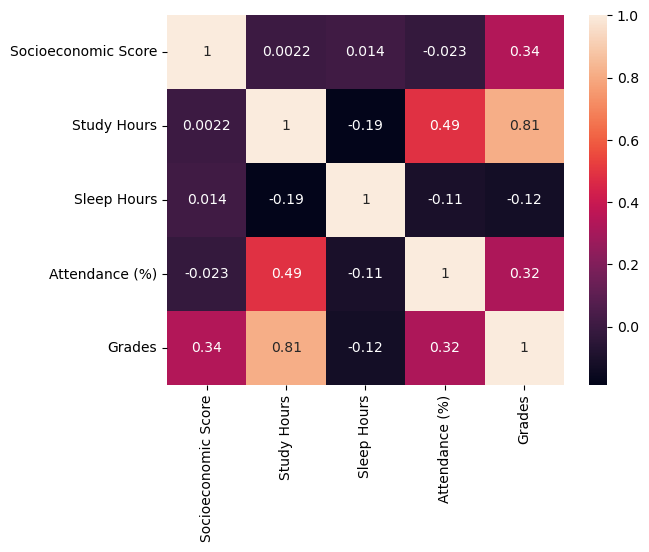

In [28]:
#heat map for better visualization and under standing for the relations 
sns.heatmap(corr_matrix,annot =True)
plt.show()

In [ ]:
# you can notice a clear vert strong relation between study hours and moderate relation between socioeconomic score and Attendance with the grades  

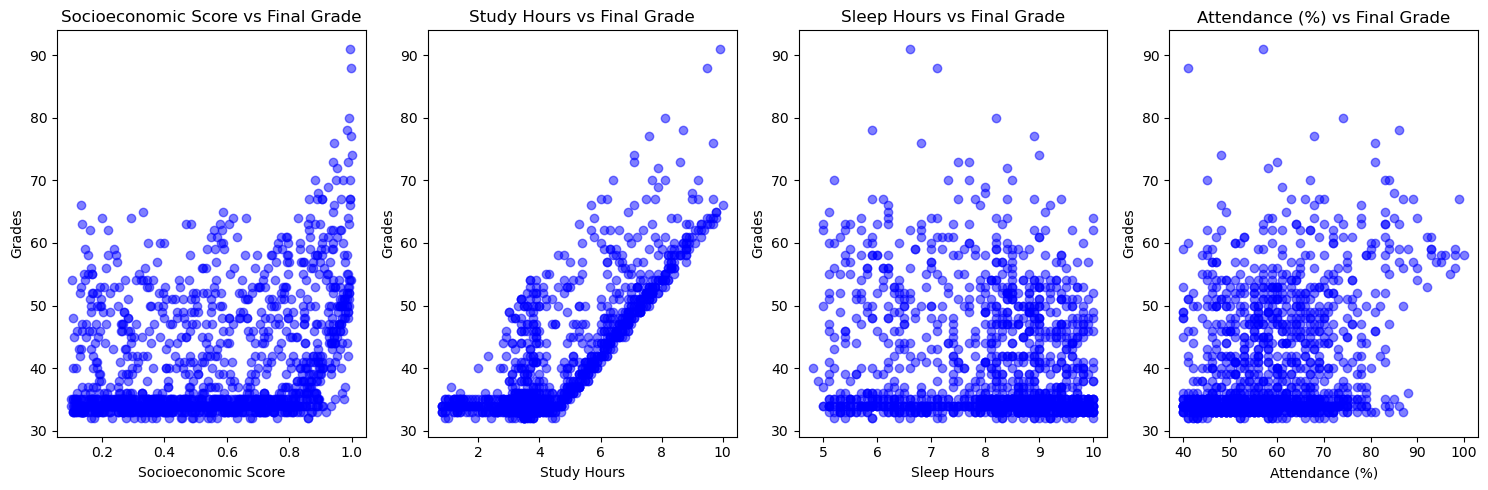

In [17]:
#visualize the relation using scatter plot
X_labels = ['Socioeconomic Score','Study Hours','Sleep Hours','Attendance (%)']

# Create subplots
fig, axes = plt.subplots(1, len(X_labels), figsize=(15, 5))

for i, col in enumerate(X_labels):
    axes[i].scatter(df[col], df['Grades'], color='blue', alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Grades')
    axes[i].set_title(f'{col} vs Final Grade')

plt.tight_layout()
plt.show()

In [19]:
#we will exclued the sleep hours becuse its very week relation

In [51]:
#dropping sleep hours column
df = df.drop(columns = ['Sleep Hours'])
df.head()

,Socioeconomic Score,Study Hours,Attendance (%),Grades
0,0.95822,3.4,53.0,47.0
1,0.85566,3.2,55.0,35.0
2,0.68025,3.2,41.0,32.0
3,0.25936,3.2,47.0,34.0
4,0.60447,3.8,75.0,33.0


In [ ]:
#lets start bulding the model 

In [53]:
#spliting the data as x = independent values , y = dependent values
x = df.iloc[:,0:3]
x

,Socioeconomic Score,Study Hours,Attendance (%)
0,0.95822,3.4,53.0
1,0.85566,3.2,55.0
2,0.68025,3.2,41.0
3,0.25936,3.2,47.0
4,0.60447,3.8,75.0
...,...,...,...
1383,0.44549,5.5,51.0
1384,0.52466,4.9,63.0
1385,0.88197,3.9,54.0
1386,0.47336,3.5,61.0


In [57]:
y = df.iloc[:,-1:]
y

,Grades
0,47.0
1,35.0
2,32.0
3,34.0
4,33.0
...,...
1383,41.0
1384,37.0
1385,36.0
1386,34.0


In [59]:
#spliting the data to train = 80% and test = 20% 
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)
x_test.shape

(278, 3)

In [61]:
#training the model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [64]:
# lets test the model and give him some numbers for prediction 
#Socioeconomic Score = 0.95	Study Hours = 3.5	Attendance = 55
model.predict([[0.95,3.5,55]])

C:\Users\10\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[41.27145992]])

In [66]:
# lets calculate the accuracy of the model
y_pred = model.predict(x_test)

In [68]:
error = y_pred - y_test
error

,Grades
667,1.879619
312,0.956398
1030,2.248144
813,2.596590
141,-0.567256
...,...
1333,-0.454954
467,-0.269183
936,0.966798
618,1.560761


In [70]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test , y_pred)
r2

0.7578063848599049

In [ ]:
# 0.7.5 consider a good number of accuracy 